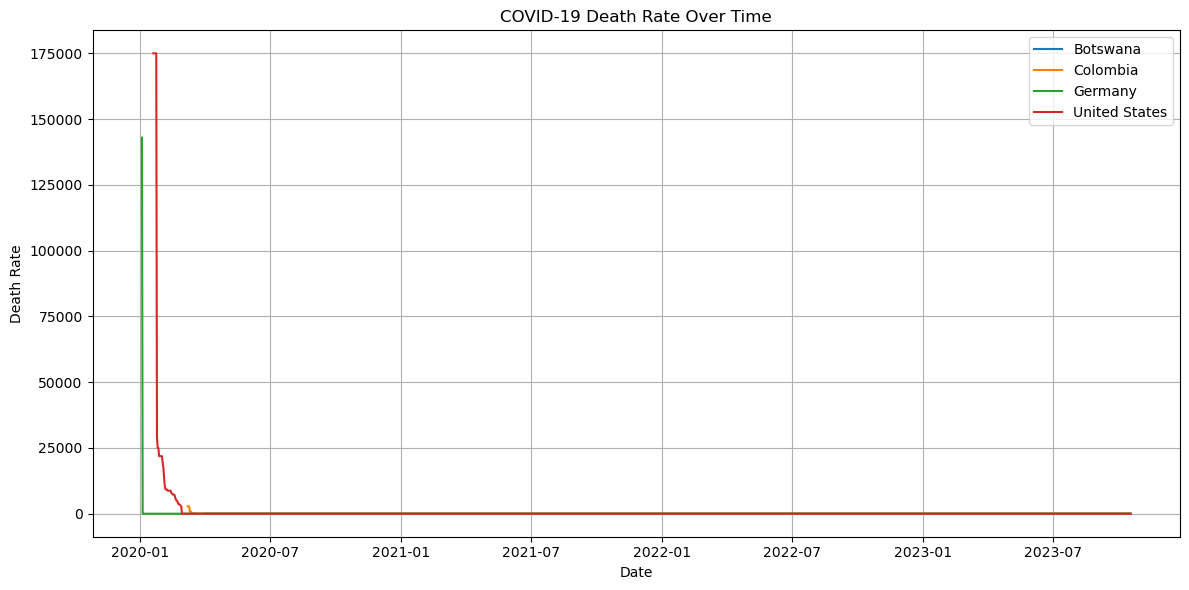

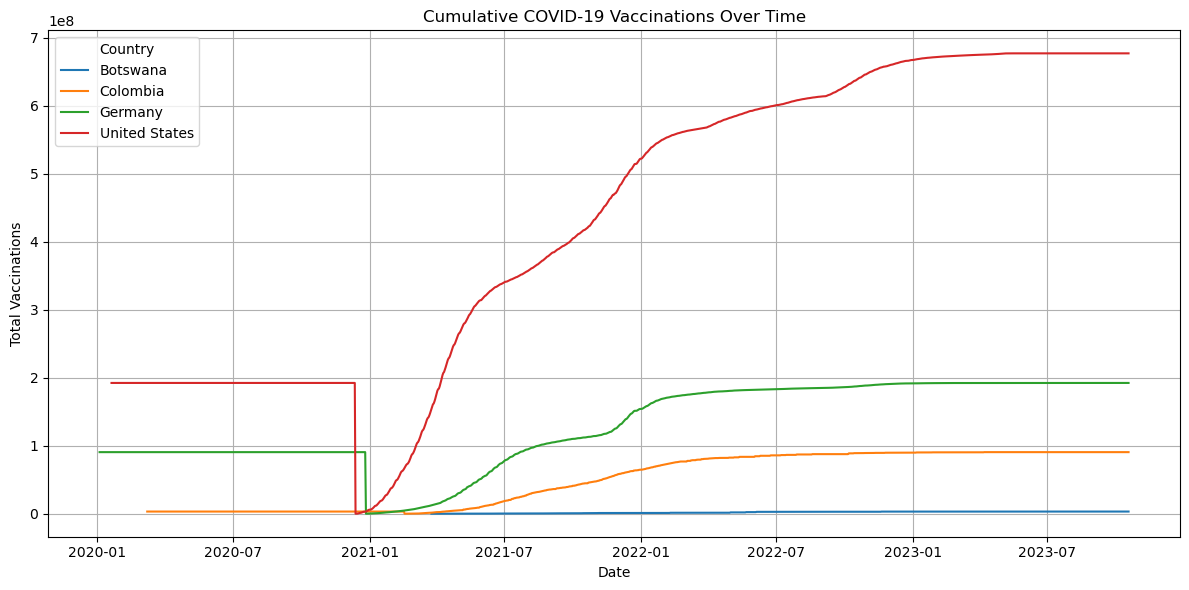

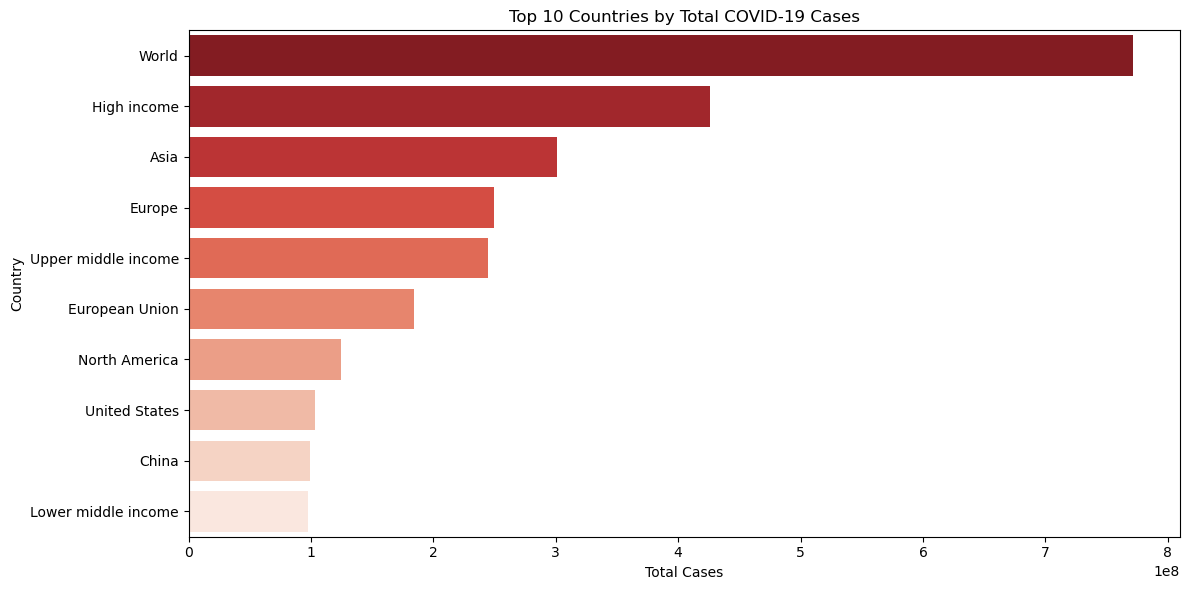

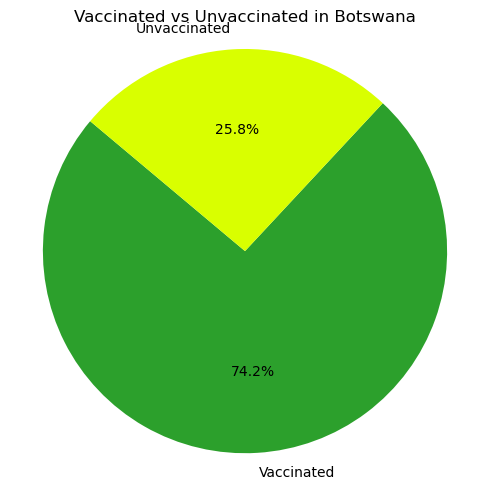

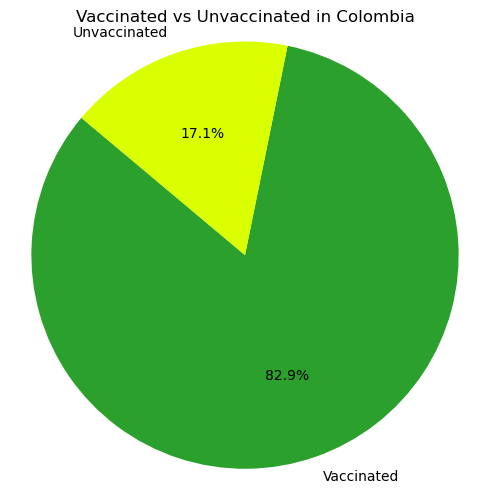

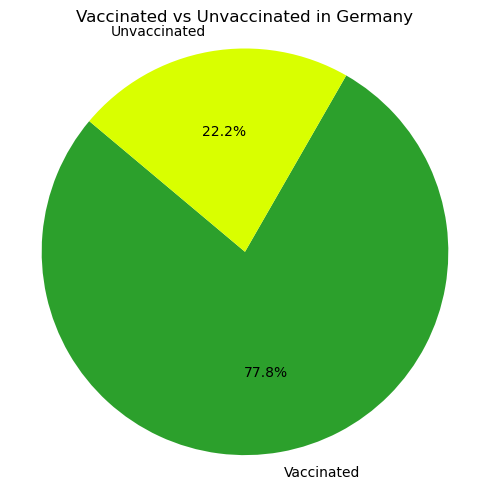

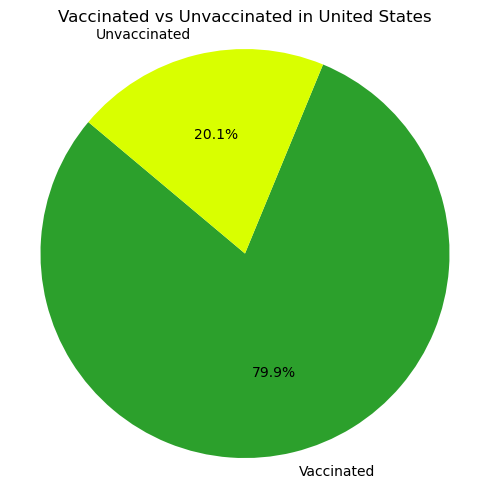

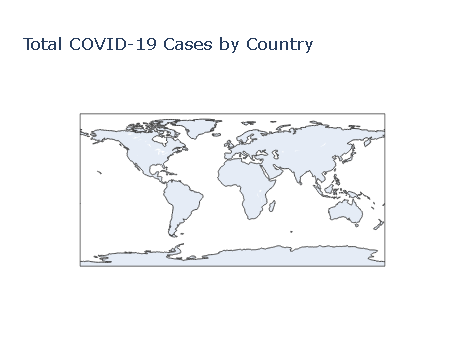

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data
covid = pd.read_csv('owid-covid-data.csv')

# Filter for selected countries
data = covid[covid['location'].isin(['Botswana', 'Colombia', 'United States', 'Germany'])].copy()
data.dropna(subset=['date', 'total_cases'], inplace=True)
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by=['location', 'date'], inplace=True)

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Plot death rate over time
data['death_rate'] = data['total_deaths'] / data['total_cases']

plt.figure(figsize=(12, 6))
for country in data['location'].unique():
    country_df = data[data['location'] == country]
    plt.plot(country_df['date'], country_df['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot total vaccinations over time
plt.figure(figsize=(12, 6))
for country in data['location'].unique():
    country_df = data[data['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

# Get the latest data per country (not just a single global date)
latest_per_country = covid.sort_values('date').dropna(subset=['total_cases'])
latest_per_country = latest_per_country.groupby('location').tail(1)

# Sort and get top 10 countries by total cases
top_countries = latest_per_country[['location', 'total_cases']].sort_values(by='total_cases', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_countries, palette='Reds_r')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Pie Chart: Vaccinated vs Unvaccinated (%)
for country in data['location'].unique():
    latest_rows = data[(data['location'] == country) & (data['people_vaccinated'].notna())]
    if latest_rows.empty:
        print(f"Skipping {country} due to missing vaccination data.")
        continue

    latest = latest_rows.sort_values('date').iloc[-1]
    vaccinated = latest['people_vaccinated']
    population = latest['population']

    if pd.isna(population) or pd.isna(vaccinated):
        print(f"Skipping {country} due to NaN population or vaccinated.")
        continue

    unvaccinated = population - vaccinated
    sizes = [vaccinated, unvaccinated]
    labels = ['Vaccinated', 'Unvaccinated']
    colors = ['#2ca02c', '#d9ff00']

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Vaccinated vs Unvaccinated in {country}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Choropleth Map: Total COVID-19 Cases by Country
latest_date = data['date'].max()
latest_df = covid[covid['date'] == latest_date]
choropleth_df = latest_df[['iso_code', 'location', 'total_cases']].dropna()

fig = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases by Country"
)
fig.show()